In [1]:
% matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from ipykernel import kernelapp as app

In [31]:
weatherpath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/climate_related/WeatherData/'
weatherfile = 'cdiac_WeatherData_2004-2014_7225.csv' #'cdiac_WeatherData_2004-2014_3021.csv'

In [32]:
weatherpath+weatherfile

'/Users/hrm/Documents/Dropbox/DSrelated/Metis/climate_related/WeatherData/cdiac_WeatherData_2004-2014_7225.csv'

In [33]:
tmpW = pd.read_csv(weatherpath+weatherfile, skiprows=1, na_values=['.','-9999'] ) 
tmpW.columns = [c.strip() for c in tmpW.columns]
tmpW.columns

Index(['Day', 'JD', 'Month', 'State_id', 'Year', 'CPRC (in)', 'PRCP (in)',
       'SNOW (in)', 'SNWD (in)', 'TAVE (F)', 'TMAX (F)', 'TMIN (F)'],
      dtype='object')

In [68]:
def Farenheit2Celsius(F):
    #Ctemp = (Ftemp - 32) * 5/9
    return (F - 32) * 5/9

In [69]:
tmpW['TAVE (C)'] = Farenheit2Celsius(tmpW['TAVE (F)'])

In [91]:
# tmpW.head().info()
# tmpW.Year.dtypes
tmpW.shape

(4018, 13)

In [134]:
tmpW.head()

,Day,JD,Month,State_id,Year,CPRC (in),PRCP (in),SNOW (in),SNWD (in),TAVE (F),TMAX (F),TMIN (F),TAVE (C),Date
0,1,1,1,'305801',2004,0.00,0.00,0.0,0.0,42,45,38,5.555556,2004-01-01
1,2,2,1,'305801',2004,0.00,0.00,0.0,0.0,43,48,38,6.111111,2004-01-02
2,3,3,1,'305801',2004,0.01,0.01,0.0,0.0,51,58,44,10.555556,2004-01-03
3,4,4,1,'305801',2004,0.41,0.40,0.0,0.0,48,58,37,8.888889,2004-01-04
4,5,5,1,'305801',2004,0.76,0.35,0.0,0.0,38,39,37,3.333333,2004-01-05


In [143]:
date=[]
# tmpW['Date'] = [(format(tmpW.Year[i]) + '-' + format(tmpW.Month[i]) + '-' + format(tmpW.Day[i]) ) for i in range(len(tmpW))]
for i in range(len(tmpW)):
    if tmpW.Month[i]<10 and tmpW.Day[i] <10:
        date.append(format(tmpW.Year[i]) + '-0' + format(tmpW.Month[i]) + '-0' + format(tmpW.Day[i]) )
    elif tmpW.Month[i]<10 and tmpW.Day[i] >10:
        date.append(format(tmpW.Year[i]) + '-0' + format(tmpW.Month[i]) + '-' + format(tmpW.Day[i]) )
    elif tmpW.Month[i]>10 and tmpW.Day[i] <10:
        date.append(format(tmpW.Year[i]) + '-' + format(tmpW.Month[i]) + '-0' + format(tmpW.Day[i]) )
    else:
        date.append(format(tmpW.Year[i]) + '-' + format(tmpW.Month[i]) + '-' + format(tmpW.Day[i]) )
        
tmpW['Date'] = date

In [144]:
len(date), len(tmpW)

(4018, 4018)

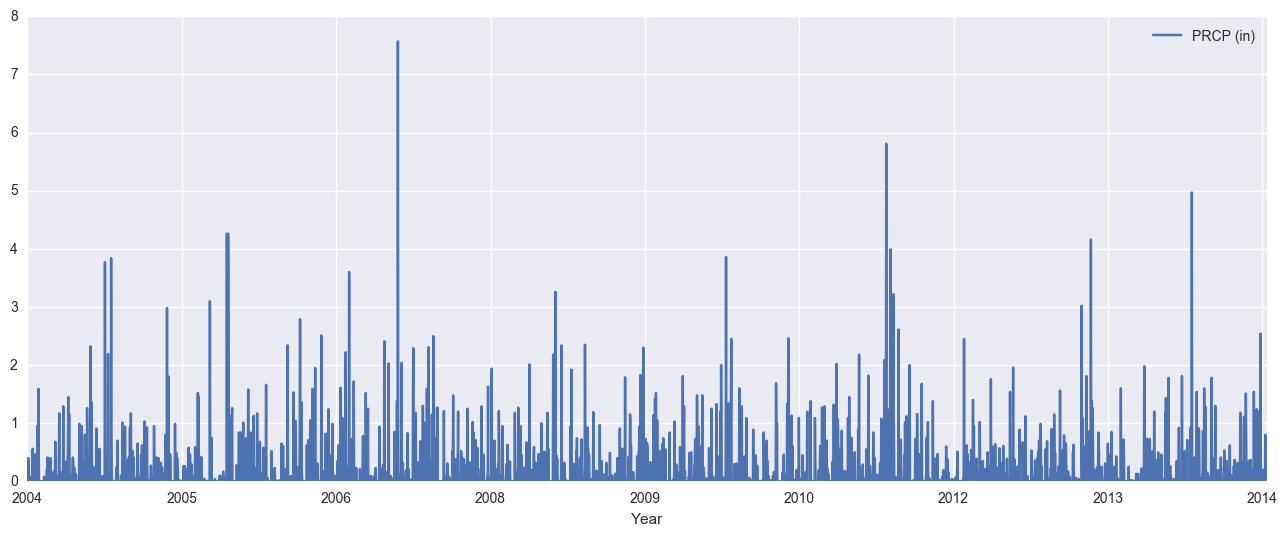

In [58]:
tmpW.plot(y=['PRCP (in)'],x= tmpW.Year.astype(str), figsize=[16,6] );

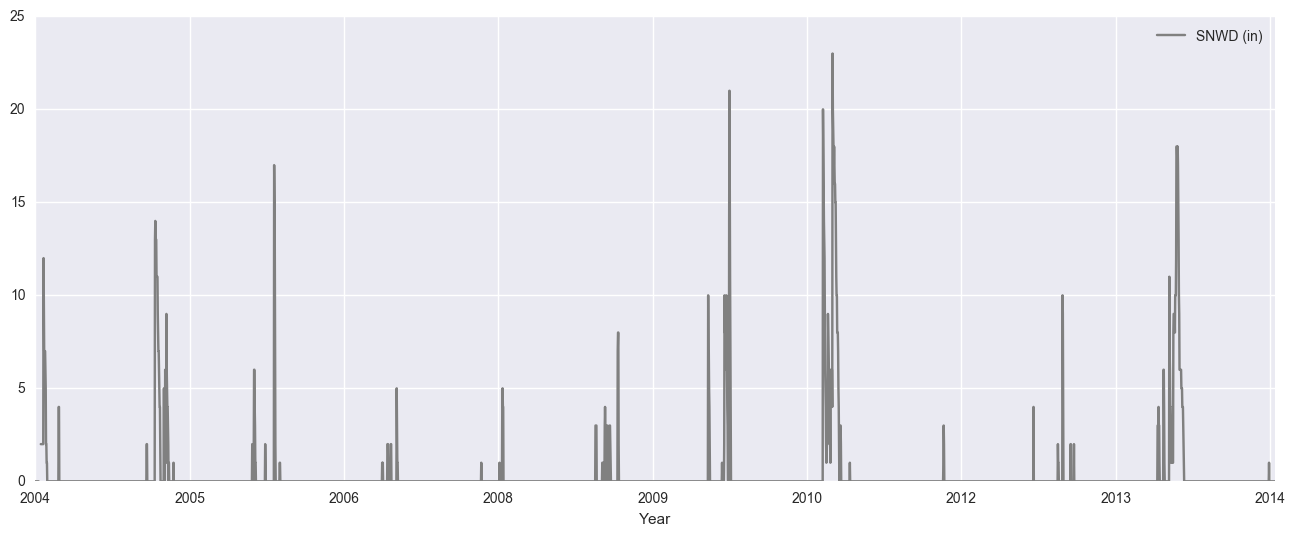

In [67]:
tmpW.plot(y=['SNWD (in)'],x= tmpW.Year.astype(str), figsize=[16,6], color='gray');

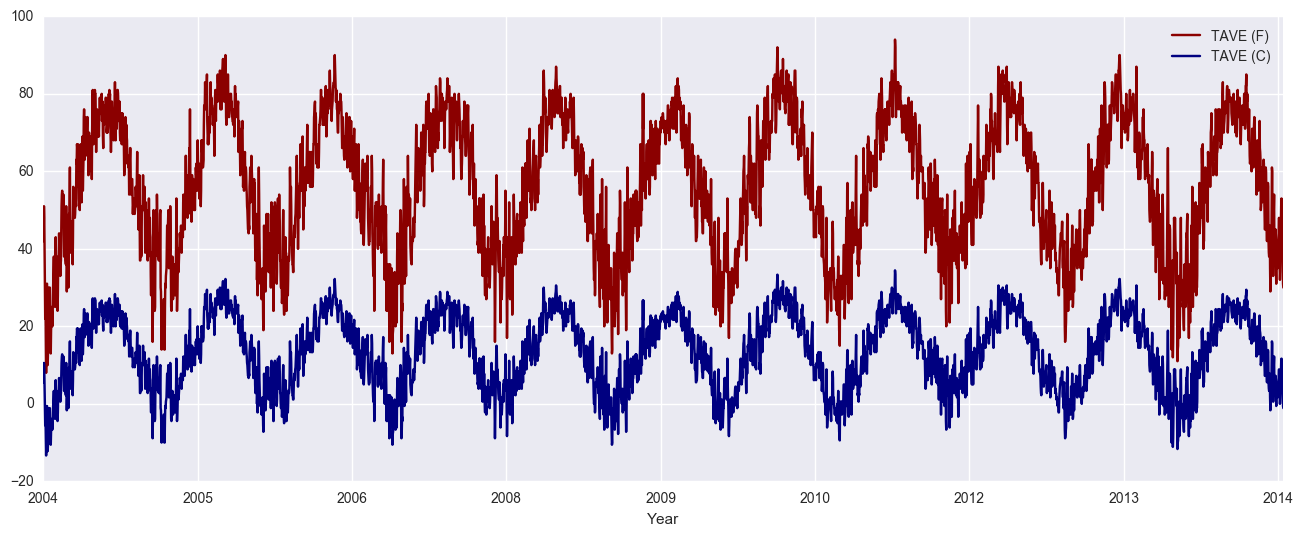

In [76]:
tmpW.plot(y=['TAVE (F)','TAVE (C)'],x= tmpW.Year.astype(str), figsize=[16,6], color=['darkred','navy']);

In [145]:
# Index(['Day', 'JD', 'Month', 'State_id', 'Year', 'CPRC (in)', 'PRCP (in)',
#        'SNOW (in)', 'SNWD (in)', 'TAVE (F)', 'TMAX (F)', 'TMIN (F)'],
#       dtype='object')
#cdiac_WeatherData_2004-2014_7225

Wdf = tmpW[['Date','Year','Month','Day','TAVE (C)','SNOW (in)','PRCP (in)']]
Wdf.to_csv(weatherpath+'cdiac_WeatherData_2004-2014_precp.csv')

In [146]:
Wdf.head()

,Date,Year,Month,Day,TAVE (C),SNOW (in),PRCP (in)
0,2004-01-01,2004,1,1,5.555556,0.0,0.00
1,2004-01-02,2004,1,2,6.111111,0.0,0.00
2,2004-01-03,2004,1,3,10.555556,0.0,0.01
3,2004-01-04,2004,1,4,8.888889,0.0,0.40
4,2004-01-05,2004,1,5,3.333333,0.0,0.35


In [83]:
Wdf['TAVE (C)'].median()

13.88888888888889

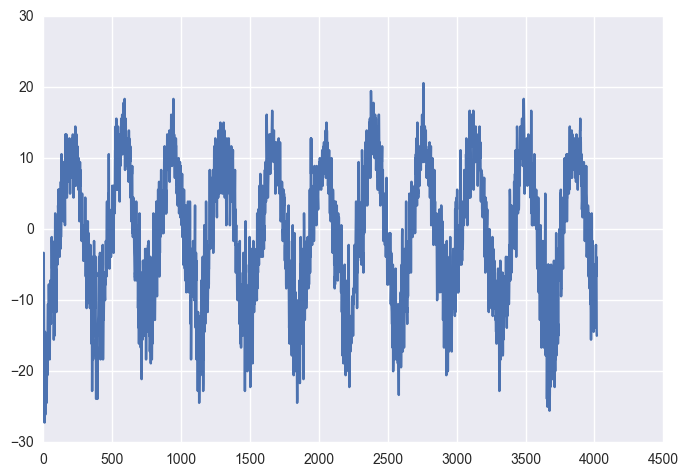

In [89]:
plt.plot(Wdf['TAVE (C)'] - Wdf['TAVE (C)'].median());